## Метод главных компонент (PCA)

In [1]:
import numpy as np

In [2]:
SIZE = 100_000  # размер выборки
# это все признаки
x = np.random.normal(SIZE)
y = np.random.normal(SIZE)

In [3]:
x, y

(100000.56340232003, 100000.35217545401)

In [4]:
# это тоже признак
z = (x+y) / 2

In [5]:
z

100000.45778888703

In [6]:
F = np.vstack([x, y, z])
FF = 1 / SIZE * F@F.T  # @ - перемножение матриц вместо np.dot()

In [7]:
FF

array([[100001.12680781, 100000.91557976, 100001.02119379],
       [100000.91557976, 100000.70435215, 100000.80996595],
       [100001.02119379, 100000.80996595, 100000.91557987]])

In [8]:
L, W = np.linalg.eig(FF)

In [9]:
L  # собственный числа

array([ 3.00002747e+05+0.00000000e+00j, -1.35464319e-11+9.44549017e-12j,
       -1.35464319e-11-9.44549017e-12j])

In [10]:
W  # собственный вектор

array([[-0.57735088+0.j        , -0.2411085 +0.34058999j,
        -0.2411085 -0.34058999j],
       [-0.57734966+0.j        , -0.46288246-0.34059071j,
        -0.46288246+0.34059071j],
       [-0.57735027+0.j        ,  0.70399073+0.j        ,
         0.70399073-0.j        ]])

In [11]:
W = sorted(zip(L, W.T), key=lambda x: x[0], reverse=True)

In [12]:
W

[((300002.74673983234+0j),
  array([-0.57735088+0.j, -0.57734966+0.j, -0.57735027+0.j])),
 ((-1.354643186556848e-11+9.445490166073452e-12j),
  array([-0.2411085 +0.34058999j, -0.46288246-0.34059071j,
          0.70399073+0.j        ])),
 ((-1.354643186556848e-11-9.445490166073452e-12j),
  array([-0.2411085 -0.34058999j, -0.46288246+0.34059071j,
          0.70399073-0.j        ]))]

## Feature_extraction

In [13]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv('https://raw.githubusercontent.com/flaymax/tmp/master/pima-indians-diabetes.csv', names=names)

In [20]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


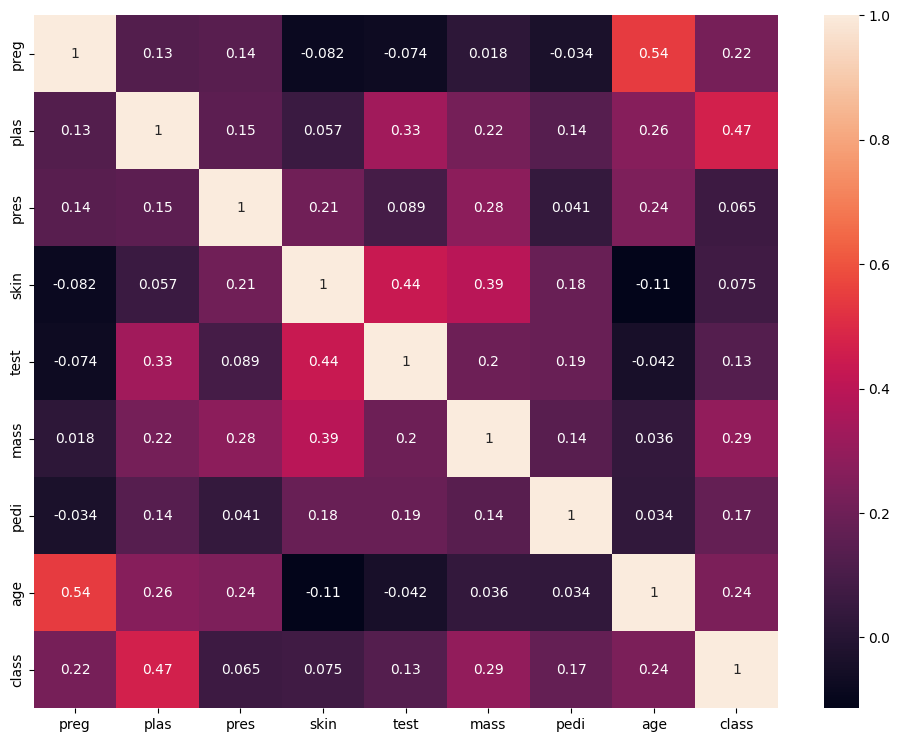

In [16]:
corr = dataframe.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True)
plt.show()

## mutual_info_score

In [18]:
from sklearn.metrics import mutual_info_score

In [19]:
for col in names[:-1]:
    print('class -', col, mutual_info_score(dataframe[col], dataframe['class']))

class - preg 0.04285406127277179
class - plas 0.21085615360952042
class - pres 0.04111026790882456
class - skin 0.05660541023678324
class - test 0.19206729136136813
class - mass 0.2383113668395052
class - pedi 0.45118180206849473
class - age 0.09769272275595872


c:\iterpreter\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\iterpreter\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


## RandomForestClassifier

In [21]:
X = dataframe.iloc[:,:8]
Y = dataframe.iloc[:,8]
# извлечение признаков
model = RandomForestClassifier(random_state=1)
model.fit(X, Y) # обучение

RandomForestClassifier(random_state=1)

In [25]:
imps = pd.Series(model.feature_importances_, index=names[:-1])
imps.sort_values(ascending=False)

plas    0.248506
mass    0.171192
age     0.139239
pedi    0.124693
pres    0.086612
preg    0.084864
test    0.076433
skin    0.068461
dtype: float64

## permutation_importance

In [23]:
from sklearn.inspection import permutation_importance

res = permutation_importance(model, X, Y)
res

{'importances_mean': array([0.0453125 , 0.18203125, 0.0265625 , 0.02421875, 0.02864583,
        0.1015625 , 0.0625    , 0.0875    ]),
 'importances_std': array([0.00454052, 0.00612948, 0.00416667, 0.00335523, 0.00273127,
        0.01051387, 0.00653641, 0.00747536]),
 'importances': array([[0.04296875, 0.04817708, 0.03776042, 0.046875  , 0.05078125],
        [0.17708333, 0.18619792, 0.18098958, 0.19140625, 0.17447917],
        [0.02994792, 0.02213542, 0.02083333, 0.02994792, 0.02994792],
        [0.02734375, 0.02864583, 0.02213542, 0.01953125, 0.0234375 ],
        [0.02604167, 0.03125   , 0.02473958, 0.02994792, 0.03125   ],
        [0.09765625, 0.10807292, 0.0859375 , 0.1171875 , 0.09895833],
        [0.06510417, 0.05078125, 0.06119792, 0.06510417, 0.0703125 ],
        [0.08333333, 0.1015625 , 0.08072917, 0.08333333, 0.08854167]])}

In [28]:
imps = pd.Series(res['importances_mean'], index=names[:-1])
imps.sort_values(ascending=False)

plas    0.182031
mass    0.101562
age     0.087500
pedi    0.062500
preg    0.045312
test    0.028646
pres    0.026562
skin    0.024219
dtype: float64

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [30]:
X, y = datasets.load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
X_train.shape

(89, 13)

In [31]:
knn = KNeighborsClassifier().fit(X_train, y_train)
knn.score(X_test, y_test)

0.6741573033707865

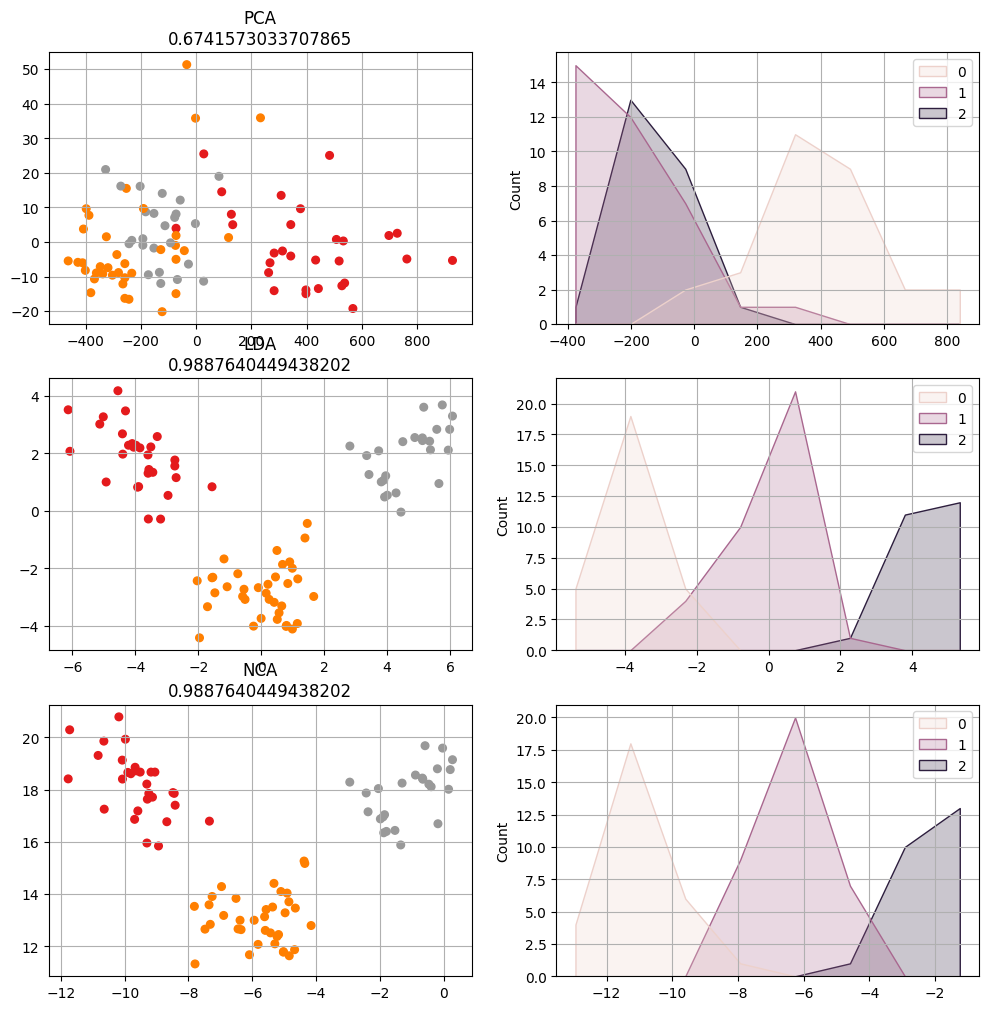

In [44]:
pca1 = PCA(n_components=1)
pca2 = PCA(n_components=2)

lda1 = LinearDiscriminantAnalysis(n_components=1)
lda2 = LinearDiscriminantAnalysis(n_components=2)

nca1 = NeighborhoodComponentsAnalysis(n_components=1)
nca2 = NeighborhoodComponentsAnalysis(n_components=2)

dim_reduction_methods = [('PCA', pca1, pca2), ('LDA', lda1, lda2), ('NCA', nca1, nca2)]

figure, axa = plt.subplots(3,2, figsize=(12,12))
    
for i, (name, model1, model2) in enumerate(dim_reduction_methods):
    
    model1.fit(X_train, y_train)
    model2.fit(X_train, y_train)

    X_tr1 = model1.transform(X_train)
    X_tr2 = model2.transform(X_train)

    axa[i,0].scatter(X_tr2[:, 0], X_tr2[:, 1], c=y_train, s=30, cmap='Set1')
    sns.histplot(x=list(X_tr1.reshape(1,-1)[0]), hue=y_train, ax=axa[i,1], element="poly")
    
    knn = KNeighborsClassifier().fit(X_tr2, y_train)
    test_score = knn.score(model2.transform(X_test), y_test)
    axa[i,0].set_title(f"{name}\n{test_score}")
    axa[i,0].grid()
    axa[i,1].grid()

plt.show()

## Функции которые оставляют нужное количество признаков

In [ ]:
%%time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

selector = SelectKBest(f_classif, k=10)
X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

X_tr.shape

CPU times: total: 0 ns
Wall time: 32.2 ms


(89, 10)

In [ ]:
knn = KNeighborsClassifier().fit(X_tr, y_train)
knn.score(X_t, y_test)

0.6629213483146067

## Функции которые оставляют нужный процент признаков

In [ ]:
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(chi2, percentile=80)
X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

X_tr.shape

(89, 10)

In [ ]:
knn = KNeighborsClassifier().fit(X_tr, y_train)
knn.score(X_t, y_test)

0.6853932584269663